<figure>
  <IMG SRC="LogoENSEGID.png" WIDTH=125 ALIGN="right">
</figure>

# ESSAIS DE NAPPE - RESOLUTION DU PROBLEME INVERSE - METHODE DE THEIS

*Préambule: une partie de cours est issue et modifiée du cours "Transient Groundwater Flow Short Course (Module 3 at UNESCO-IHE, Delft, Netherlands)" construit par Theo Olsthoorn, 08-Jan-2018 et du "Guide des essais de pompage et leurs interprétations" par R.P. Chapuis, 2007*

Les essais de nappe sont réalisés pour obtenir les propriétés hydrodynamiques (transmissivité et coefficient d'emmagasinnement) de l'aquifère. Cette détermination est basée sur l'exploitation des données obtenues lors de la réalisation d'un pompage d'essai sur le site de caractérisation. Cette approche constitue la résolution du problème inverse en hydrogéologie.

La réalisation de ce type de test nécessite a minima d'enregistrer sur un ou plusieurs ouvrages (cf. vidéo ci-après):
- le rabattement au cours du temps (la différence entre la hauteur piézométrique au repos dans l'ouvrage et la durant le pompage)  aux piézomètres d'observation;
- le débit d'exploitation au puits de pompage.

L'interprétation de l'essai de nappe en nappe captive est basée sur l'exploitation de la solution de Theis à l'équation de diffusivité. L'utilisation a minima d'un piézomètre d'observation peut être complétée par d'autres piézomètres afin de compléter l'estimation des paramètres de l'aquifère et avoir une idée notamment de son hétérogénéïté.

A la fin de la partie de terrain, on doit disposer du jeu de données suivant:
- valeur du débit (supposé constant) au puits de pompage;
- valeur du rabattement au cours du temps $ s = f(t)$ à la distance $r$ du piézomètre et éventuellement aux autres piézomètres d'observation.

A l'issue de l'interprétation du test, on obtient les paramètres hydrodynamiques de l'aquifère (transmissivité T et coefficient d'emmagasinnement S) et éventuellement des renseignements complémentaires sur les conditions de gisement de la nappe (effets de limite, drainance,...).

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('0rRd_DqilwI')

## Equation de diffusivité en nappe captive

$$\frac{\partial^2 h}{\partial r^2} + \frac{1}{r}\frac{\partial h}{\partial r} = \frac{S}{Kb} \times \frac{\partial h}{\partial t}$$

## Solution de Theis 

### Hypothèses:
- Aquifère reposant sur un couche imperméable
- Formations géologiques homogènes, isotropes, horizontales et d'extension horizontale infinie
- Surface piézométrique initialement horizontale
- Loi de Darcy valide
- Puits parfait et de diamètre négligeable
- Eau provient uniquement de la décompression de l'aquifère

### Equation de Theis 
En réalisation le changement de variable suivant:
$$
	u = \frac{r^2S}{4Kbt}
$$

La résolution de l'équation de diffusivité pour les hypothèses (conditions limites) précédentes amène la solution de Theis

$$
    s = \frac{Q}{4 \pi T} \int_{u}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y
$$

### Fonction de Theis
Cette résolution introduit la fonction de Theis  $W(u)$ définie par analogie à l'équation précédente:

$$
	W(u) = \int_{u}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y
$$

La fonction $W(u)$ est connue également en mathématiques sous le terme de fonction Exponentielle Intégrale $E_i$:

$$
	E_i = \int_{-\infty}^{u} {\frac{e^{y}}{y}} \mathrm{d}y
$$
Une fonction alternative $E_1$ peut être définie, de la même famille que la fonction exponentielle intégrale $E_i$ telle que:

$$
    E_1(x) = -E_i(-x) = \int_{x}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y = W(u)
$$


## 1. Solution de Theis: fonctionnement élémentaire

### Question 1.a
A partir du tableau de valeurs de la fonction exponentielle intégrale de Theis et de l'abaque correspondante ($W(u) = f(\frac{1}{u})$ ou $W(u) = f(\frac{1}{u})$), se familiariser avec la lecture des variables $u$ et $W(u)$.

<figure>
  <IMG SRC="ENS2_Hydrodyn_8.png" WIDTH=800 ALIGN="left">
</figure>

### Question 1.b
La fonction de Theis dans un environnement "scientifique", comment obtenir les valeurs utiles à l'hydrogéologue?

#### Expression de la fonction de Theis à partir d'un développement en série de Taylor

La fonction de Theis peut également être exprimée selon un développement en série de Taylor. On obtient une formulation en série infinie de puissance:

$$
    W(u) = -\gamma - ln(u) - \sum_{n=1}^{\infty} {\frac{(-1)^n u^n}{n(n)!}}
$$

soit sous la forme développée

$$
    W(u) = -\gamma - ln(u) + u -\frac{u^2}{2.2!} + \frac{u^3}{3.3!} - \frac{u^4}{4.4!} + - \frac{u^5}{5.5!} - \cdots
$$

avec $\gamma = 0.5773$ (nombre d'Euler).

Cette expression corresponds à une série infinie convergente. $W(u)$ peut être approché en tronquant la série infinie après un nombre de terme suffisant

Par exemple, en tronquant la série au 4ème terme:
$$
    W(u) = -\gamma - ln(u) + u -\frac{u^2}{2.2!} + \frac{u^3}{3.3!} - \frac{u^4}{4.4!}
$$


In [ ]:
# Développement de Taylor
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

U = 4.0 * 10** -np.arange(11.)   # generates values 4, 4e-1, 4e-2 .. 4e-10
print("{:>10s} {:>10s} {:>10s}".format('u  / ', 'W(u) série tronquée  /', 'W(u) Theis'))
for u in U:
    W = sp.exp1(u)
    w = -0.5772 -np.log(u) + u - ((u)**2)/(2*sp.factorial(2)) + ((u)**3)/(3*sp.factorial(3))- ((u)**4)/(4*sp.factorial(4))
    print("{:.3e} {:.3e} {:.3e}".format(u, w, W))

#### Calcul de W(u) à partir des fonctionnalités intégrées de Python

La fonction exponetielle intégrale est implémentée dans la bibliothèque "Scipy.Special" sous la forme "exp1".
On peut directement calculer la valeur $W(u$) telle que:
$$
    W(u) = \int_{u}^{\infty} {\frac{e^{-y}}{y}} \mathrm{d}y = exp1(u)
$$  

In [27]:
# fonction intégrée Python
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

u = 0.08  # choisir une valeur de u
print('exp1(u)    =', sp.exp1(u),', module scipy.special')

exp1(u)    = 2.0269410025857417 , module scipy.special


#### Calcul de W(u) à partir d'une intégration numérique

Comme toute fonction mathématique continue et dérivable, la fonction de Theis peut faire l'objet d'une intégration numérique afin d'estimer la valeur de $W(u)$ pour toute valeur de borne particulière $u$.

Afin de réaliser cette intégration, il est nécessaire de réécrire la forme continue de la fonction de Theis à l'aide d'une formulation discontinue:
$$
    W(u) = \intop_u^{-\infty} \frac {e^{-y}} y dy \approx \sum_0^N \frac {e^{-y_i}} {y_i} \Delta y_i
$$

où $y_0 = u_0$ et $N$ est un entier suffisamment grand.

Le package numpy permet de réaliser une intégration numérique, en définissant préalablement la fonction à intégrer comme une fonction Python.

In [28]:
# intégration numérique

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt


def Wint(u):
    '''Renvoie la valeur de la fonction de Theis obtenue par intégration numérique'''
    LOG10INF = 2 # sufficient as exp(-100) is in the order of 1e-50
    y = np.logspace(np.log10(u), LOG10INF, num=1000)
    arg = np.exp(-y) / y
    dy = np.diff(y)
    w = np.sum(0.5 * (arg[:-1] + arg[1:]) * dy)
    return w

u = 0.08  # choisir une valeur de u
print('Wint(u)    =', Wint(u),', obtenu par intégration numérique')

Wint(u)    = 2.0269702874381887 , obtenu par intégration numérique


#### Représentation graphique de la fonction W(u)

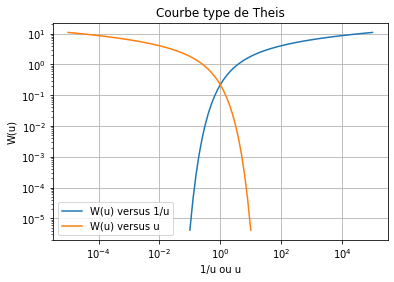

In [29]:
# Illustration
# Representation graphique de la fonction de Theis

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# calcul de u avec echantillonnage log10
u = np.logspace(-5, 1, 61)

# paramétrage de la figure W(u)
plt.title('Courbe type de Theis')
plt.xlabel('1/u ou u')
plt.ylabel('W(u)')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.plot(1/u, sp.exp1(u),label='W(u) versus 1/u') # plot well function versus 1/u
plt.plot(u, sp.exp1(u),label='W(u) versus u') # plot well function versus u
plt.legend(loc='best')

plt.show()

### Question 1.c Impact d'un pompage en nappe captive
Un puits parfait exploite une nappe captive d'épaisseur constante $b$. La conductivité hydraulique $K$ est supposée constante. Le puits est exploité au débit constant $Q$. Calculer le rabattement au bout d'une durée d'exploitation $t$ à une distance d'observation $r$ du puits d'exploitation
Application numérique:
- $K = 3.10^{-4}$ m/s
- $S = 2.10^{-4}$
- $b = 25$ mètres
- $Q = 135$ m3/h
- $t = 5$ heures
- $r = 42$ mètres


In [35]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

#conditions de l'essai
Q = 135 # débit (m3/h)
r = 42 # distance piézomètre/puits (m)
t = 5 # (h)
#aquifère
K = 3e-4 # (m/s)
S = 2e-4 # (-)
b = 25 # (m)

#cohenrece unités SI
Q = Q / 3600
t = t * 3600

# calcul du rabattement au piezometre p
s_p = Q / (4 * np.pi * K * b) * sp.exp1((r ** 2 * S)/ (4 * K * b * t))

print(s_p)

#avec un formalisme plus conventionnel !
print('Le rabattement au piézomètre est',  "{:.2e}".format(s_p), 'mètres')

2.688469433021163
Le rabattement au piézomètre est 2.69e+00 mètres


### Bonus: représentation 2D

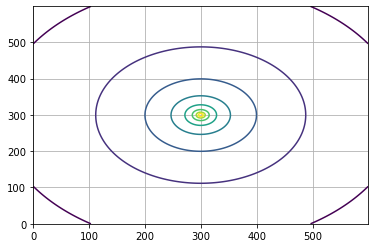

In [13]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

K = 3e-4 # (m/s)
S = 2e-4 # (-)
b = 25 # (m)

xf1 = 300 #0 < (m) < 600
yf1 = 300 #0 < (m) < 600

Qf1 = 135 #m3/h

t = 5  # pompage synchrones heure


x = np.linspace(0,600,600)
y = np.linspace(0,600,600)
X, Y = np.meshgrid(x, y)

r1 = np.sqrt((X-xf1) ** 2 + (Y-yf1) ** 2)
u1 = r1**2. * S / (4 * (K * b) * (t * 3600))
s1 = (Qf1 / 3600)/(4 * np.pi * (K * b)) * sp.exp1(u1)

level = np.arange(1,5,0.50) #valeur des iso (min,max,delta)
plt.contour(s1,level)
plt.clabel(map, fontsize=9, inline=1)
plt.grid()
plt.show()

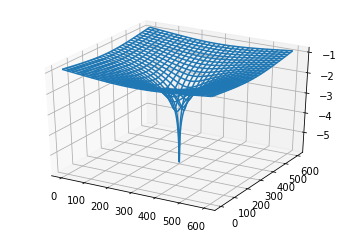

In [25]:
# une petite vue 3D
# code recupere de "https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html" et utilisé sans modification

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, -s1, rstride=20, cstride=20)
plt.show()

y = -0.01170 * x^2 + 3.25443 * x + -155.02783


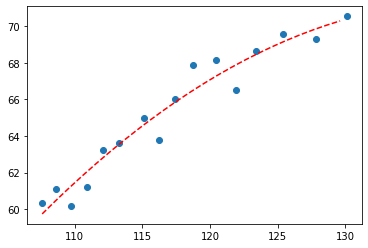

In [7]:
#---------------------------------------------------------------------
# identification du modèle théorique susceptible de restituer le comportement des données expérimentale/observées
# modèle POLYNOMIAL
#---------------------------------------------------------------------

# define the true objective function ("modèle")
def objective(x, a, b, c):
	return a * x ** 2 + b * x + c

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x^2 + %.5f * x + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()



## 2. Solution de Theis - Problème inverse :interprétation d'un essai de nappe

Pour caractériser les propriétés hydrodynamiques d'un aquifère, un essai de nappe est réalisé. Un puits $F$ est pompé au débit de 547 litre/minute durant 12 heures. Les profondeurs sont enregistrés à un piézomètre $P_a$ situé à 8.2 mètres de $F$ (fichier TD_Theis1.csv: colonne 1 t en minute, colonne 2 profondeur eau m/repère). Le niveau statique de la nappe est $N_{stat} = -5.32$ mètre/repère.
2. A l'aide de la solution de Theis, déterminer les paramètres hydrodynamiques de l'aquifère (T et S). Pour se faire, on réalisera un ajustement manuel de la fonction de Theis
3. Reprendre la question précédente, en utilisant un ajustement numérique de la fonction de Theis

### Question 2.1
Construire le graphique expérimental log(s) = log10(t);

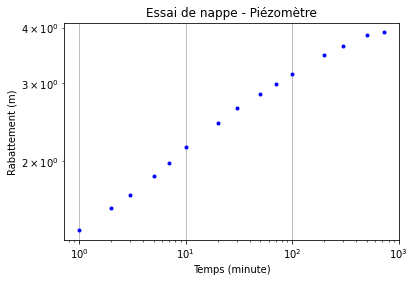

In [131]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

#RECUPERATION DES DONNEES
#lecture fichier local
#data = np.genfromtxt('TD_Theis2.csv',delimiter=',')
#t en min - profondeur eau m/rep

#lecture fichier Github pour Colabotary on line
data = np.genfromtxt('https://raw.githubusercontent.com/larroque852/NB_ENS2_theis_jacob/main/TD_Theis2.csv',delimiter=',')
#t en min - profondeur eau m/rep

#REPRESENTATION GRAPHIQUE DES DONNEES

t=data[:,0] #Attention: par défaut l'unité est la minute
s_mes=data[:,1]-5.32 # calcul du rabattement s = prof(t) - prof(t=0)

# parametrage figure
plt.title('Essai de nappe - Piézomètre')
plt.xlabel('Temps (minute)')
plt.ylabel('Rabattement (m)')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.plot(t, s_mes, '.', color = 'blue') # 
plt.show()

### Question 2.2
A l'aide de la solution de Theis, déterminer les paramètres hydrodynamiques de l'aquifère (T et S). Pour se faire, on réalisera un ajustement manuel de la fonction de Theis

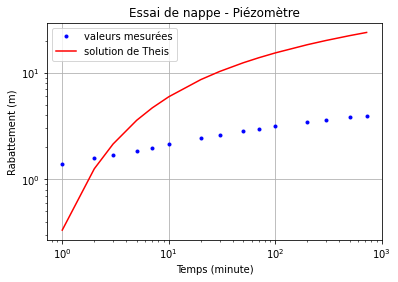

In [132]:

#conditions de l'essai
Q = 0.547 # débit (m3/min )
r = 8.2 # distance piézomètre/puits (m)

#valeurs à faire varier (bon courage!!!)
T = 1e-2 #m2/min
S = 1e-3

sT_man = Q / (4 * np.pi * T) * sp.exp1(( r ** 2 * S)/(4 * T * t))

#graphique
plt.title('Essai de nappe - Piézomètre')
plt.xlabel('Temps (minute)')
plt.ylabel('Rabattement (m)')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.plot(t, s_mes, '.', color = 'blue', label='valeurs mesurées') # valeurs mesurees
plt.plot(t, sT_man, color ='red',label='solution de Theis' )
plt.legend()
plt.show()

### Question 2.3
Reprendre la question précédente, en utilisant un ajustement numérique de la fonction de Theis

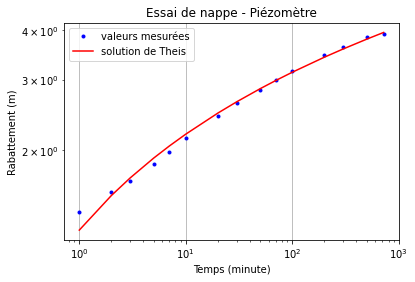

Resultats ajustement:
T = 1.1e-01 m2/min
S = 1.7e-04 (-)


In [133]:
#bibliotheque d'optimisation (on a besoin que de la fonction curve_fit)
from scipy.optimize import curve_fit

#conditions de l'essai

Q = 0.547 # débit (m3/min )
r = 8.2 # distance piézomètre/puits (m)

# définition du modèle de Theis
def theis(t,T, S):
    sT = Q / (4 * np.pi * T) * sp.exp1(( r ** 2 * S)/(4 * T * t))
    return sT

#AJUSTEMENT DE LA SOLUTION DE THEIS

#valeurs initiales des paramètres (nécessaire pour initier l'ajustement)
#T = 100 #m2/min
#S = 0.01#(--)

best_vals, covar= curve_fit(theis, t, s_mes)
sT2 = theis(t,best_vals[0],best_vals[1])
# parametrage figure
plt.title('Essai de nappe - Piézomètre')
plt.xlabel('Temps (minute)')
plt.ylabel('Rabattement (m)')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.plot(t, s_mes, '.', color = 'blue', label='valeurs mesurées') # 
plt.plot(t,theis(t,best_vals[0],best_vals[1]), color ='red',label='solution de Theis' )
plt.legend()
plt.show()

Tok = best_vals[0]
Sok = best_vals[1]
print('Resultats ajustement:')
print('T = {:.1e} m2/min'.format(Tok))
print('S = {:.1e} (-)'.format(Sok))


## 2. Test de ‘Oude Korendijk, south of Rotterdam, The Netherlands'
La description du test est tirée de *Analysis and evaluation of pumping test data - Kruseman and de Ridder pp. 56*:

The lithological cross-section (figure) of the test site is derived from the borings. The first 18 m below the surface, consisting of clay, peat, and clayey fine sand, form the impermeable confining layer. Between 18 and 25 m below the surface lies the aquifer, which consists of coarse sand with some gravel. The base of the aquifer is formed by fine sandy and clayey sediments, which are considered impermeable.
<figure>
  <IMG SRC="cross_section.png" WIDTH=750 ALIGN="center">
</figure>
The well screen was installed over the whole thickness of the aquifer, and piezometers were placed at distances of 0.8, 30, 90, and 215 m from the well, and at different depths. The two piezometers at a depth of 30 m, H30, and H215 showed a drawdown during pumping, from which it could be concluded that the clay layer between 25 and 27 m is not completely impermeable. For our purposes, however, we shall assume that all the water was derived from the aquifer between 18 and 25 m, and that the base is impermeable. The well was pumped at a constant discharge of 9.12 L/s (or 788 m3/d) for nearly 14 hours.
    
1. Construire le graphique expérimental	log(s) = log10(t) pour les 3 piézomètres H30, H90 et H215;
2. A l'aide de la solution de Theis, déterminer les paramètres hydrodynamiques de l'aquifère (T et S) à partir des données de H30 et H90.
3. Quelles informations complémentaires peuvent apporter les données issues de H215? Cela vous semble t-il cohérent avec la coupe géologique?

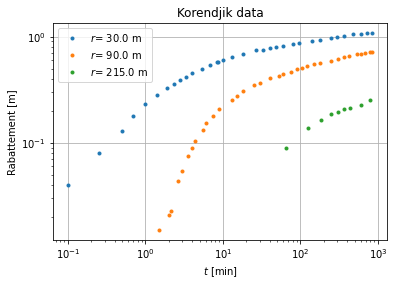

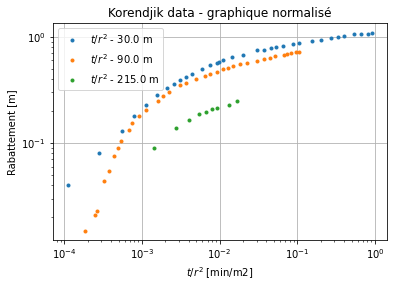

In [134]:
#1. Construire le graphique expérimental log(s) = log10(t) pour les 3 piézomètres H30, H90 et H215;
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

#lecture fichier local
#data = np.genfromtxt('Korendijk_data.csv',delimiter=',')

#lecture fichier Github pour Colabotary on line
data = np.genfromtxt('https://raw.githubusercontent.com/larroque852/NB_ENS2_theis_jacob/main/Korendijk_data.csv',delimiter=',')

# affichage des données (juste 1ere ligne 4 colonnes first 4 lines)
# Les colonnes sont [r[m], z[Korendijk_datam], t[minutes], s[m]] (cf. fichier initial .csv)
#data[:4] 
#print(data[0])

# Le nombre de valeurs uniques de la première colonne définissent également le nombre de piézomètres dont nous disposons
distances = np.unique(data[:, 0])
#print(distances)

# parametrage de la figure s = f(t) [min]
plt.title('Korendjik data')
plt.ylabel('Rabattement [m]')
plt.xlabel('$t$ [min]')
plt.xscale('log')
plt.yscale('log')
plt.grid()

# plot the data pour chaque piezometre avec fonction boucle
for r in distances:
    I = data[:, 0] == r # creation d'un index
    # selection des temps pour chaque piezometre
    t = data[I,2] # [min]
    plt.plot(t, data[I,3], '.',
             label='$r$= {:.1f} m'.format(r)) 
plt.legend()
plt.show()


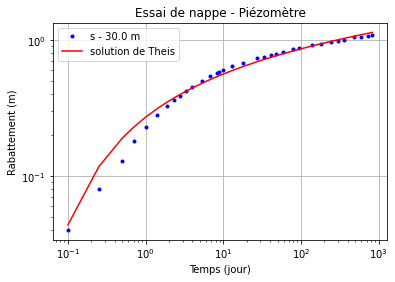

Resultats ajustement:
T = 3.3e-01 m2/min
S = 1.1e-04 (-)
A comparer avec les valeurs trouvées in Kruseman and de Ridder: T=392 m2/jour et S = 1.6 x 10-4


In [139]:
#2 interpretation au piezometre r = 30m
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#lecture fichier local
data = np.genfromtxt('Korendijk_data.csv',delimiter=',')

#lecture fichier Github pour Colabotary on line
#data = np.genfromtxt('https://raw.githubusercontent.com/larroque852/NB_ENS2_theis_jacob/main/Korendijk_data.csv',delimiter=',')

#conditions de l'essai
Q = 788/24/60 # débit (m3/min )

# définition du modèle de Theis
def theis(t, T, S):
    sT = Q / (4 * np.pi * T) * sp.exp1(( r ** 2 * S)/(4 * T * t))
    return sT

r = 30 # distance piézomètre/puits (m)
I = data[:, 0] == r # creation d'un index
t30 = data[I,2] # [min]
s30 = data[I,3]

best_vals, covar= curve_fit(theis, t30, s30)

# parametrage figure
plt.title('Essai de nappe - Piézomètre')
plt.xlabel('Temps (min)')
plt.ylabel('Rabattement (m)')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.plot(t30, s30, '.', color = 'blue', label='s - {:.1f} m'.format(r)) # 
plt.plot(t30,theis(t30,best_vals[0],best_vals[1]), color ='red',label='solution de Theis' )
plt.legend()
plt.show()

T30 = best_vals[0]
S30 = best_vals[1]
print('Resultats ajustement:')
print('T = {:.1e} m2/min'.format(T30))
print('S = {:.1e} (-)'.format(S30))

print('A comparer avec les valeurs trouvées in Kruseman and de Ridder: T=392 m2/jour et S = 1.6 x 10-4')

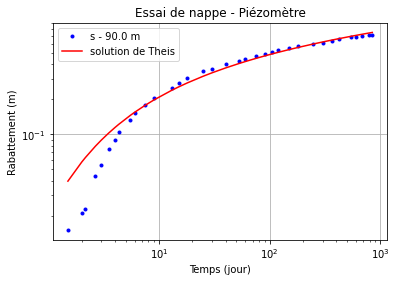

Resultats ajustement:
T = 3.5e-01 m2/min
S = 2.0e-04 (-)


In [100]:
#2 interpretation au piezometre r = 90m
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#lecture fichier local
data = np.genfromtxt('Korendijk_data.csv',delimiter=',')

#lecture fichier Github pour Colabotary on line
#data = np.genfromtxt('https://raw.githubusercontent.com/larroque852/NB_ENS2_theis_jacob/main/Korendijk_data.csv',delimiter=',')

#conditions de l'essai
Q = 788/24/60 # débit (m3/min )

# définition du modèle de Theis
def theis(t, T, S):
    sT = Q / (4 * np.pi * T) * sp.exp1(( r ** 2 * S)/(4 * T * t))
    return sT

r = 90 # distance piézomètre/puits (m)
I = data[:, 0] == r # creation d'un index
t90 = data[I,2] # [min]
s90 = data[I,3]

best_vals, covar= curve_fit(theis, t90, s90)

# parametrage figure
plt.title('Essai de nappe - Piézomètre')
plt.xlabel('Temps (min)')
plt.ylabel('Rabattement (m)')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.plot(t90, s90, '.', color = 'blue', label='s - {:.1f} m'.format(r)) # 
plt.plot(t90,theis(t90,best_vals[0],best_vals[1]), color ='red',label='solution de Theis' )
plt.legend()
plt.show()

T90 = best_vals[0]
S90 = best_vals[1]
print('Resultats ajustement:')
print('T = {:.1e} m2/min'.format(T90))
print('S = {:.1e} (-)'.format(S90))

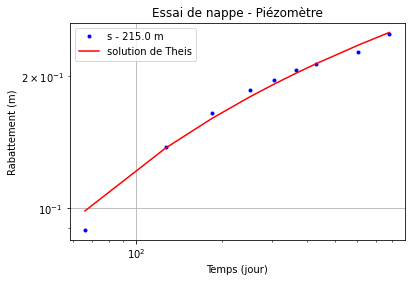

Resultats ajustement:
T = 6.6e-01 m2/min
S = 5.5e-04 (-)


In [136]:
#2 interpretation au piezometre r = 215m
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#lecture fichier local
#data = np.genfromtxt('Korendijk_data.csv',delimiter=',')

#lecture fichier Github pour Colabotary on line
data = np.genfromtxt('https://raw.githubusercontent.com/larroque852/NB_ENS2_theis_jacob/main/Korendijk_data.csv',delimiter=',')

#conditions de l'essai
Q = 788/24/60 # débit (m3/min )

# définition du modèle de Theis
def theis(t, T, S):
    sT = Q / (4 * np.pi * T) * sp.exp1(( r ** 2 * S)/(4 * T * t))
    return sT

r = 215 # distance piézomètre/puits (m)
I = data[:, 0] == r # creation d'un index
t215 = data[I,2] # [min]
s215 = data[I,3]


#best_vals, covar= curve_fit(theis, t215, s215)
#utilisation de valeurs initiales pour l'ajustement du modele
best_vals, covar= curve_fit(theis, t215, s215,[1e-2,1e-4])

# parametrage figure
plt.title('Essai de nappe - Piézomètre')
plt.xlabel('Temps (min)')
plt.ylabel('Rabattement (m)')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.plot(t215, s215, '.', color = 'blue', label='s - {:.1f} m'.format(r)) # 
plt.plot(t215,theis(t215,best_vals[0],best_vals[1]), color ='red',label='solution de Theis' )
plt.legend()
plt.show()

T215 = best_vals[0]
S215 = best_vals[1]
print('Resultats ajustement:')
print('T = {:.1e} m2/min'.format(T215))
print('S = {:.1e} (-)'.format(S215))


## Méthode graphique de Theis - Principe général
Petit rappel pour la solution de Theis (1) pour un aquifère de transmissivité $T$, de coefficient d'emmagasinement $S$ et soumis à un pompage constant au débit $Q$:

$$
    s = \frac{Q}{4 \pi T} W(u)
$$

avec (2) pour une observation à $t$ à la distance $r$ du puits de pompage:

$$
u = \frac{r^2S}{4Tt}
$$

La solution de Theis (1) peut être ecrite (3):
$$
    s = \frac{QW(u)}{4 \pi T} 
$$

Soit en logarithmes décimaux (4):
$$
log \ s = log \ (Q/4\pi T) + log \ W(u)
$$

L'équation (2) peut également être réécrite (5):
$$
r^2/t = 4uT/S
$$

et en logarithmes décimaux (6)
$$
log \ (r^2/t) = log \ (4T/S) + log \ u
$$

La méthode classique d'interprétation graphique de Theis est basée sur l'exploitation de la courbe théorique de Theis reportée sur un papier bi-log. Les axes du graphique retenus pour la fonction de Theis sont les couples  $log \ W(u)$ versus $log \ (1/u)$ ou $log \ W(u)$ versus $log \ (u)$. Le choix de $1/u$ au lieu de $u$ permet d'obtenir une courbe de Theis d'allure plus intuitive et directement comparable à la courbe expérimentale $s = f(t)$ obtenue lors de l'essai de nappe sur le terrain puisque le rabattement croît proportionnellement à l'augmentation du temps $t$ de pompage.

Les données expérimentales de l'essai de pompage sont tracées sur un papier bilog avec comme choix des axes $log \ (s)$ versus $log \ (r^2/t)$ ou $log \ (s)$ versus $log \ (t/r^2)$.

**------------  Apparté  -------------**

Propriétés du $ log $
$$
log(A \times B / C) = log \ (A) + log / (B) - log \ (C)
$$
Sur un graphique log-log, la courbe $log(A)$ est identique à la courbe $log(A*B/C)$ avec un décalage de $log(B)-log(C)$  
Le décalage entre les deux courbes peut etre déterminé graphiquement en superposant visuellement les 2 courbes dans leurs repères de coordonnées respectifs (*Curve matching*). Le décalage peut être quantifié en utilisant un point (*Match point*) et ses jeux de coordonnées dans les deux systèmes de coordonnées respectifs.

**------------    fin    -------------**

Puisque $1/u$ est proportionnel à $t/r^2$, toutes les données qui ont le même $t/r^2$ vont s'aligner graphiquemebt sur le même $1/u$. Ainsi, pour un même test dans un aquifère homogène, tous les piézomètres s'aligneront sur la même courbe.

L'axe de la courbe de Theis et la courbe expérimentale sont différents d'un facteur constant, les données et $1/u$ peuvent être appariés par un décalage horizontal sur la représentation log. De plus, les valeurs de rabattement et la fonction de Theis sont également différents d'un facteur constant, donc les données et la courbe type peuvent être appariés par un déphasage vertical lorsqu'on utilise une échelle log pour la représentation graphique.

En résumé, cel implique que sur un graphique log-log, les données et la courbe type de Theis ont la même forme et peuvent être décalées horizontalement et verticalement pour qu'elles soient superposées. Les déphasages vertical et horizontal permettent de déterminer les deux facteurs qui permettent la détermination de la transmissivité T et du coefficient d'emmagasinement S: c'est la méthode graphique historique de Theis (cf. figure ci-après - Chapuis, 2007).

<figure>
  <IMG SRC="theis_graph.png" WIDTH=650 ALIGN="center">
</figure>



## Tutorial inside: ajustement d'un modèle à des données observées

L'ajustement d'un modèle est un problème d'optimisation qui permet à partir d'une fonction paramètrique connue (*le modèle*) de déterminer ses paramètres afin de restituer au mieux un jeu de données (*observations*).
On peut représenter cette méthode simplement en 2 dimensions, avec un domaine défini par des *entrées* et des *sorties*. Les abscisses sont les données indépendanes d'entrée de la fonction modèle. Les ordonnées représentent les données dépendantes de sortie de la fonction modèle.
On a collecté des données expérimentales/mesurées d'entrée/sortie d'un système que l'on suspece fonctionner selon le modèle pré-identifié.
L'ajustement d'un modèle consiste à choisir un type de modèle, puis estimer les paramètres adaptés de manière à restituer au mieux les valeurs observées.

Le package SciPy dans sa librairie d'optimisation '*optimize*' procure une fonction *Curve_fit* qui permet l'ajustement d'un modèle défini par une fonction paramétrique quelconque à des données expérimentales ou mesurées, et d'estimer les paramètres optimaux minimisant l'écart entre valeurs modélisées et valeurs mesurées.

La procédure est la suivante:
- mise en forme des données expérimentales/observées en identifiant variables dépendantes et indépendantes
- identification du modèle théorique susceptible de resituer le comportement des données expérimentale/observées
- programmation d'une fonction '*modèle*' comprenant les paramètres à ajuster
- estimation des paramètres optimums
- évaluation de la qualité de l'ajustement et des incertitudes associées (non abordé ici)

Afin de se familiariser avec cette démarche à l'aide des outils disponibles dans Python, on se propose de réaliser un exercice.
Cet exercice est directement adapté du tutorial "*Curve fitting with Python*" disponible à l'adresse suivante:

https://machinelearningmastery.com/curve-fitting-with-python/

L'objectif est de se familiariser avec les commandes principales permettant de résoudre ce type de problématique.

Les différents points sont abordés:
- chargement et représentation graphique des données observées
- choix d'un modèle linéaire et ajustement des paramètres optimums
- choix d'un modèle polynomial et ajustement des paramètres optimums

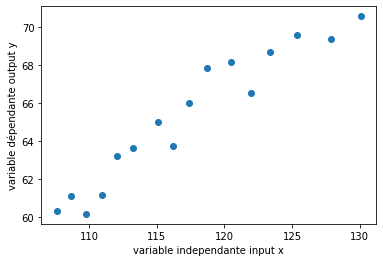

In [2]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

#---------------------------------------------------------------------
# chargement et représentation graphique des données observées
#---------------------------------------------------------------------

# plot "Population" vs "Employed"
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
data = np.genfromtxt('data_tuto.csv',delimiter=',')
# choose the input and output variables
x, y = data[:, 1], data[:, 2]
# plot input vs output
pyplot.scatter(x, y)
plt.xlabel('variable independante input x')
plt.ylabel('variable dépendante output y')
pyplot.show()



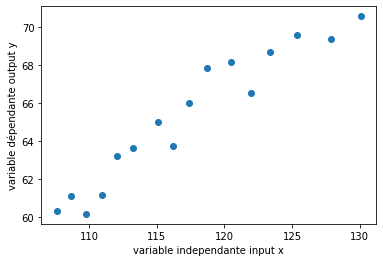

In [49]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

#---------------------------------------------------------------------
# chargement et représentation graphique des données observées
#---------------------------------------------------------------------

# plot "Population" vs "Employed"
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
data = np.genfromtxt('data_tuto.csv',delimiter=',')
# choose the input and output variables
x, y = data[:, 1], data[:, 2]
# plot input vs output
pyplot.scatter(x, y)
plt.xlabel('variable independante input x')
plt.ylabel('variable dépendante output y')
pyplot.show()



y = 0.48488 * x + 8.38067


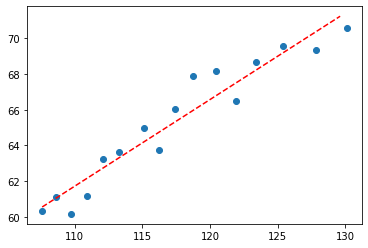

In [51]:
#---------------------------------------------------------------------
# identification du modèle théorique susceptible de restituer le comportement des données expérimentale/observées
# modèle LINEAIRE
#---------------------------------------------------------------------

# define the true objective function ("modèle")
def objective(x, a, b):
	return a * x + b

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()



y = -0.01170 * x^2 + 3.25443 * x + -155.02783


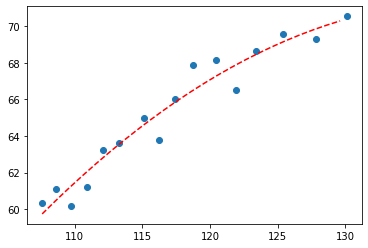

In [52]:
#---------------------------------------------------------------------
# identification du modèle théorique susceptible de restituer le comportement des données expérimentale/observées
# modèle POLYNOMIAL
#---------------------------------------------------------------------

# define the true objective function ("modèle")
def objective(x, a, b, c):
	return a * x ** 2 + b * x + c

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x^2 + %.5f * x + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()



## Bibliographie

Kruseman, G.P. & N.D. de Ridder (1994) Pumping test analysis. Disponible sur Internet.